In [1]:
# Dependencies
import random
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import locale
from locale import atof
import scipy.stats as stats
from pandas.plotting import scatter_matrix

In [2]:
jan_2018_df = pd.read_csv("../Resources/Jan_2018.csv")
# jan_2017_df = pd.read_csv("../Resources/Jan_2017.csv")
# jan_2016_df = pd.read_csv("../Resources/Jan_2016.csv")
# apr_2018_df = pd.read_csv("../Resources/Apr_2018.csv")
# apr_2017_df = pd.read_csv("../Resources/Apr_2017.csv")
apr_2016_df = pd.read_csv("../Resources/Apr_2016.csv")
jul_2017_df = pd.read_csv("../Resources/July_2017.csv")
# jul_2016_df = pd.read_csv("../Resources/July_2016.csv")
# jul_2015_df = pd.read_csv("../Resources/July_2015.csv")
# oct_2017_df = pd.read_csv("../Resources/Oct_2017.csv")
# oct_2016_df = pd.read_csv("../Resources/Oct_2016.csv")
oct_2015_df = pd.read_csv("../Resources/Oct_2015.csv")

master_stats_df = jan_2018_df
# master_stats_df = master_stats_df.append(jan_2017_df)
# master_stats_df = master_stats_df.append(jan_2016_df)
# master_stats_df = master_stats_df.append(apr_2018_df)
# master_stats_df = master_stats_df.append(apr_2017_df)
master_stats_df = master_stats_df.append(apr_2016_df)
master_stats_df = master_stats_df.append(jul_2017_df)
# master_stats_df = master_stats_df.append(jul_2016_df)
# master_stats_df = master_stats_df.append(jul_2015_df)
# master_stats_df = master_stats_df.append(oct_2017_df)
# master_stats_df = master_stats_df.append(oct_2016_df)
master_stats_df = master_stats_df.append(oct_2015_df)

#master_stats_df = pd.read_csv("../Resources/Jan_2018.csv")
master_stats_df.fillna(value=0 , inplace=True)

unique_carrier_list = master_stats_df["UniqueCarrier"].unique()

Delay_df = master_stats_df[master_stats_df.DepDelayMinutes > 0]
beforetime_df = master_stats_df[master_stats_df.ArrDelay < 0]
cancelled_flights_df = master_stats_df[master_stats_df.Cancelled > 0]
diverted_flights_df = master_stats_df[master_stats_df.Diverted > 0]

master_stats_df.head()

C:\Users\ksk4uever\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (48,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ActualElapsedTime,AirTime,AirlineID,ArrDel15,ArrDelay,ArrDelayMinutes,ArrTime,ArrTimeBlk,ArrivalDelayGroups,CRSArrTime,...,TailNum,TaxiIn,TaxiOut,TotalAddGTime,UniqueCarrier,Unnamed: 109,WeatherDelay,WheelsOff,WheelsOn,Year
0,355.0,324.0,0.0,0.0,-24.0,0.0,0.0,0001-0559,0.0,0.0,...,0,0.0,0.0,0.0,AA,0.0,0.0,0.0,0.0,2018
1,350.0,327.0,0.0,0.0,-36.0,0.0,0.0,0001-0559,0.0,0.0,...,0,0.0,0.0,0.0,AA,0.0,0.0,0.0,0.0,2018
2,364.0,344.0,0.0,0.0,-17.0,0.0,0.0,0001-0559,0.0,0.0,...,0,0.0,0.0,0.0,AA,0.0,0.0,0.0,0.0,2018
3,345.0,325.0,0.0,0.0,-34.0,0.0,0.0,0001-0559,0.0,0.0,...,0,0.0,0.0,0.0,AA,0.0,0.0,0.0,0.0,2018
4,356.0,334.0,0.0,0.0,-32.0,0.0,0.0,0001-0559,0.0,0.0,...,0,0.0,0.0,0.0,AA,0.0,0.0,0.0,0.0,2018


In [3]:
#master_stats_df.dtypes

In [4]:
# carrier_group_df = master_stats_df.groupby("UniqueCarrier")

# # carrier_total_flights_df.columns

# carrier_total_flights_df = carrier_group_df["Flights"].sum()
# count_chart = carrier_total_flights_df.plot(kind='bar', figsize= (10,5))

# # Set the xlabel and ylabel using class methods
# count_chart.set_xlabel("Carrier Codes")
# count_chart.set_ylabel("Total Flights")

# plt.title("Total Flights VS Carrier Codes")
# plt.grid(axis='y')
# plt.figtext(0.95,0.9, "Carrier Codes:", bbox=dict(facecolor='grey', alpha=0.5) )
# plt.figtext(0.95,0.85, "9E - Pinnacle Airlines")
# plt.figtext(0.95,0.80, "AA - American Airlines")
# plt.figtext(0.95,0.75, "AS - Alaska Airlines")
# plt.figtext(0.95,0.70, "B6 - Jetblue AirLines")
# plt.figtext(0.95,0.65, "DL - Delta AirLines")
# plt.figtext(0.95,0.60, "EV - Atlantic Southeast Airlines")
# plt.figtext(0.95,0.55, "F9 - Frontier Airlines")
# plt.figtext(0.95,0.50, "G4 - Allegiant Air")
# plt.figtext(0.95,0.45, "HA - Hawaiian Airlines")
# plt.figtext(0.95,0.40, "MQ - American Eagle Airlines")
# plt.figtext(0.95,0.35, "NK - Spirit Airlines")
# plt.figtext(0.95,0.30, "OH - Comair")
# plt.figtext(0.95,0.25, "OO - SkyWest Airlines")
# plt.figtext(0.95,0.20, "UA - United Airlines")
# plt.figtext(0.95,0.15, "VX - Virgin America")
# plt.figtext(0.95,0.10, "WN - Southwest Airlines")
# plt.figtext(0.95,0.05, "YV - Mesa Airlines")
# plt.figtext(0.95,0.01, "YX - Midwest Airlines")
# plt.show()
# plt.tight_layout()


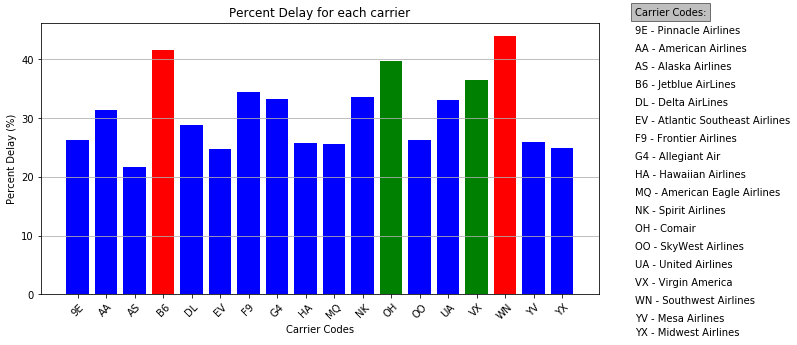

In [5]:
carrier_group_df = master_stats_df.groupby("UniqueCarrier")

carrier_delay_group_df = Delay_df.groupby("UniqueCarrier")


carrier_delay_per  = []

carrier_delay_per = [carrier_delay_group_df.get_group(carrier).size/carrier_group_df.get_group(carrier).size* 100 for carrier in unique_carrier_list]

colors = ['r' if value >= 40 else 'g' if value >= 35 else 'b'  for value in carrier_delay_per]
plt.figure(figsize=(10,5))
plt.bar(unique_carrier_list,carrier_delay_per, color = colors)
plt.xlabel("Carrier Codes")
plt.ylabel("Percent Delay (%)")
plt.xticks(rotation = 45)

plt.title("Percent Delay for each carrier")
plt.grid(axis='y')
plt.figtext(0.95,0.9, "Carrier Codes:", bbox=dict(facecolor='grey', alpha=0.5) )
plt.figtext(0.95,0.85, "9E - Pinnacle Airlines")
plt.figtext(0.95,0.80, "AA - American Airlines")
plt.figtext(0.95,0.75, "AS - Alaska Airlines")
plt.figtext(0.95,0.70, "B6 - Jetblue AirLines")
plt.figtext(0.95,0.65, "DL - Delta AirLines")
plt.figtext(0.95,0.60, "EV - Atlantic Southeast Airlines")
plt.figtext(0.95,0.55, "F9 - Frontier Airlines")
plt.figtext(0.95,0.50, "G4 - Allegiant Air")
plt.figtext(0.95,0.45, "HA - Hawaiian Airlines")
plt.figtext(0.95,0.40, "MQ - American Eagle Airlines")
plt.figtext(0.95,0.35, "NK - Spirit Airlines")
plt.figtext(0.95,0.30, "OH - Comair")
plt.figtext(0.95,0.25, "OO - SkyWest Airlines")
plt.figtext(0.95,0.20, "UA - United Airlines")
plt.figtext(0.95,0.15, "VX - Virgin America")
plt.figtext(0.95,0.10, "WN - Southwest Airlines")
plt.figtext(0.95,0.05, "YV - Mesa Airlines")
plt.figtext(0.95,0.01, "YX - Midwest Airlines")

plt.show()
plt.tight_layout()
plt.show()

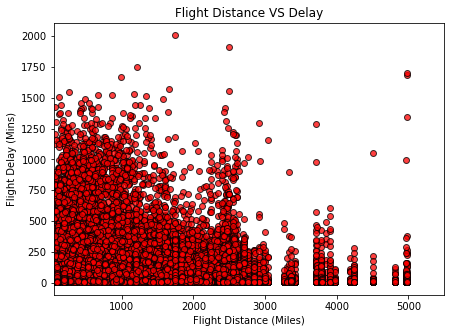

In [6]:
plt.figure(figsize=(7,5))
plt.scatter(Delay_df["Distance"], Delay_df["DepDelayMinutes"],marker="o", facecolors="red", edgecolors="black",alpha=0.75)
plt.title("Flight Distance VS Delay")
plt.xlabel("Flight Distance (Miles)")
plt.ylabel("Flight Delay (Mins)")
plt.xlim(50,5500)
plt.show()

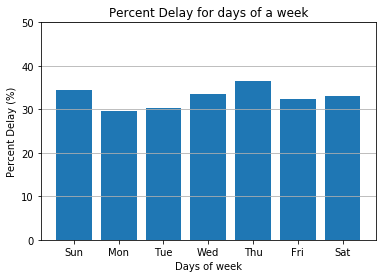

In [7]:
weekdays_delay_df = Delay_df.groupby("DayOfWeek")
weekdays_total_df = master_stats_df.groupby("DayOfWeek")

weekday_delay_per  = []
weekday_list = master_stats_df["DayOfWeek"].unique()
tick_labels = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]

weekday_delay_per = [weekdays_delay_df.get_group(day).size/weekdays_total_df.get_group(day).size* 100 for day in weekday_list]

plt.bar(weekday_list,weekday_delay_per)
plt.xlabel("Days of week")
plt.ylabel("Percent Delay (%)")
plt.title("Percent Delay for days of a week")
plt.grid(axis='y')
plt.xticks(weekday_list, tick_labels)
plt.ylim(0,50)
plt.show()
plt.tight_layout()
plt.show()

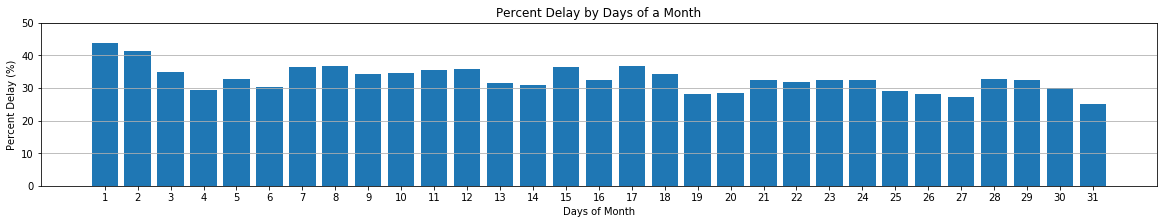

In [8]:
daily_delay_df = Delay_df.groupby("DayofMonth")
daily_total_df = master_stats_df.groupby("DayofMonth")

daily_delay_per  = []
daily_list = master_stats_df["DayofMonth"].unique()

daily_delay_per = [daily_delay_df.get_group(day).size/daily_total_df.get_group(day).size* 100 for day in daily_list]

plt.figure(figsize=(20,3))
plt.bar(daily_list,daily_delay_per)
plt.xlabel("Days of Month")
plt.ylabel("Percent Delay (%)")
plt.title("Percent Delay by Days of a Month")
plt.grid(axis='y')
plt.ylim(0,50)
plt.xticks(daily_list)
plt.show()
plt.tight_layout()
plt.figure(figsize=(20,30))


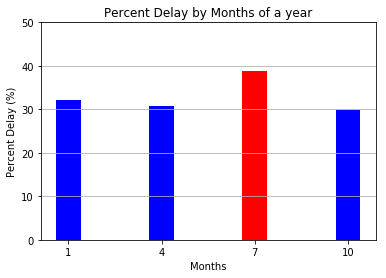

In [9]:
monthly_delay_df = Delay_df.groupby("Month")
monthly_total_df = master_stats_df.groupby("Month")

monthly_delay_per  = []
monthly_list = master_stats_df["Month"].unique()

monthly_delay_per = [monthly_delay_df.get_group(month).size/monthly_total_df.get_group(month).size* 100 for month in monthly_list]

colors = ['r' if value >= 35 else 'b'  for value in monthly_delay_per]
plt.bar(monthly_list,monthly_delay_per, color = colors)
plt.xlabel("Months")
plt.ylabel("Percent Delay (%)")
plt.title("Percent Delay by Months of a year")
plt.grid(axis='y')
plt.ylim(0,50)
plt.xticks(monthly_list)
plt.show()
plt.tight_layout()



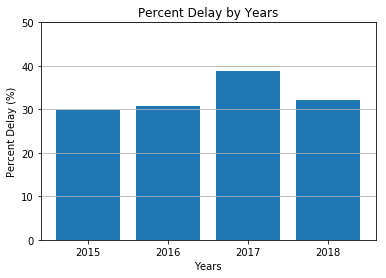

In [10]:
yearly_delay_df = Delay_df.groupby("Year")
yearly_total_df = master_stats_df.groupby("Year")

yearly_delay_per  = []
yearly_list = master_stats_df["Year"].unique()

yearly_delay_per = [yearly_delay_df.get_group(year).size/yearly_total_df.get_group(year).size* 100 for year in yearly_list]


plt.bar(yearly_list,yearly_delay_per)
plt.xlabel("Years")
plt.ylabel("Percent Delay (%)")
plt.title("Percent Delay by Years")
plt.grid(axis='y')
plt.ylim(0,50)
plt.xticks(yearly_list)

plt.show()
plt.tight_layout()


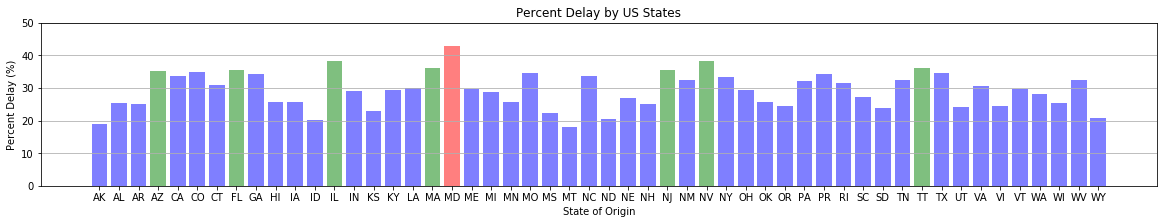

In [11]:
state_delay_df = Delay_df.groupby("OriginState")
state_total_df = master_stats_df.groupby("OriginState")

state_delay_per  = []
state_list = master_stats_df["OriginState"].unique()

state_delay_per = [state_delay_df.get_group(state).size/state_total_df.get_group(state).size* 100 for state in state_list]

colors = ['r' if value >= 40 else 'g' if value >= 35 else 'b'  for value in state_delay_per]

plt.figure(figsize=(20,3))
plt.bar(state_list,state_delay_per,color=colors, alpha=0.5, align="center")
plt.xlabel("State of Origin")
plt.ylabel("Percent Delay (%)")
plt.title("Percent Delay by US States")
plt.grid(axis='y')
plt.ylim(0,50)
plt.show()
plt.tight_layout()



Text(0.5,1,'Delay Reasons')

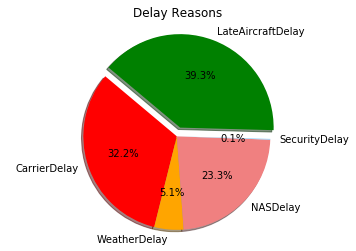

In [12]:
#http://aspmhelp.faa.gov/index.php/Types_of_Delay

labels = ["CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay"]
delay_reasons_df = master_stats_df[["CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay"]]
count = delay_reasons_df.sum()

explode = (0, 0, 0, 0, 0.1)

colors = ["red", "orange", "lightcoral", "lightskyblue","green"]

plt.pie(count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.title("Delay Reasons")

In [13]:
# dep_timeblk_df = Delay_df.groupby("DepTimeBlk")["DepDelayMinutes"].sum()

# # Create a bar chart based off of the group series from before
# count_chart = dep_timeblk_df.plot(kind='bar', figsize= (15,5))

# # Set the xlabel and ylabel using class methods
# count_chart.set_xlabel("Departure Time")
# count_chart.set_ylabel("Total Delay (Mins)")

# plt.title("Total Delay (Mins) VS Departure Time")
# plt.grid(axis='y')
# plt.show()
# plt.tight_layout()

C:\Users\ksk4uever\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


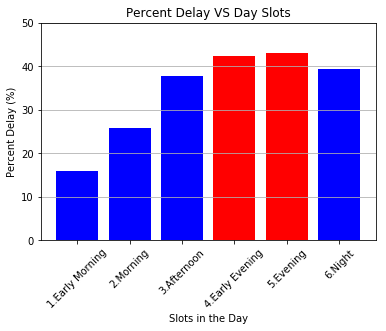

In [14]:
bins = [1, 659, 1159, 1559, 1859, 2059, 2359]

# Create the names for the bins
group_names = ["1.Early Morning","2.Morning","3.Afternoon","4.Early Evening","5.Evening","6.Night"]

time_slot_df = master_stats_df
time_slot_df["Day Slot"] = pd.cut(time_slot_df["CRSDepTime"], bins, labels=group_names)

time_slot_delay_df = Delay_df
time_slot_delay_df["Day Slot"] = pd.cut(time_slot_delay_df["CRSDepTime"], bins, labels=group_names)

time_slot_grouped_df = time_slot_df.groupby("Day Slot")
#time_slot_grouped_df.count()

time_slot_delay_grouped_df = time_slot_delay_df.groupby("Day Slot")
#time_slot_delay_grouped_df.count()

time_slot_per_delay = [time_slot_delay_grouped_df.get_group(slot).size/time_slot_grouped_df.get_group(slot).size * 100 for slot in group_names]


colors = ['r' if value >= 40 else 'b'  for value in time_slot_per_delay]
plt.bar(group_names,time_slot_per_delay, color=colors)
plt.xlabel("Slots in the Day")
plt.ylabel("Percent Delay (%)")
plt.xticks(rotation = 45)
plt.ylim (0,50)

plt.title("Percent Delay VS Day Slots")
plt.grid(axis='y')
plt.show()
plt.tight_layout()

plt.figtext(1.0,0.7, "Note:")
plt.figtext(1.0,0.65, "Circle size correlates with driver count per city.")

plt.show()

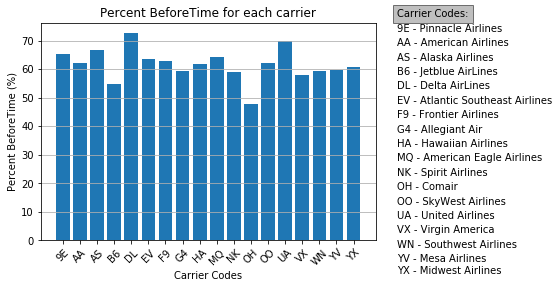

In [15]:
carrier_beforetime_group_df = beforetime_df.groupby("UniqueCarrier")
#print(airline_group_df.count())
carrier_total_beforetime_df = carrier_beforetime_group_df["ArrDelay"].sum()

carrier_bt_per  = []

carrier_bt_per = [carrier_beforetime_group_df.get_group(carrier).size/carrier_group_df.get_group(carrier).size* 100 for carrier in unique_carrier_list]

# print(unique_carrier_list)
# print(carrier_delay_per)

plt.bar(unique_carrier_list,carrier_bt_per)
plt.xlabel("Carrier Codes")
plt.ylabel("Percent BeforeTime (%)")
plt.xticks(rotation = 45)

plt.title("Percent BeforeTime for each carrier")
plt.grid(axis='y')
plt.figtext(0.95,0.9, "Carrier Codes:", bbox=dict(facecolor='grey', alpha=0.5) )
plt.figtext(0.95,0.85, "9E - Pinnacle Airlines")
plt.figtext(0.95,0.80, "AA - American Airlines")
plt.figtext(0.95,0.75, "AS - Alaska Airlines")
plt.figtext(0.95,0.70, "B6 - Jetblue AirLines")
plt.figtext(0.95,0.65, "DL - Delta AirLines")
plt.figtext(0.95,0.60, "EV - Atlantic Southeast Airlines")
plt.figtext(0.95,0.55, "F9 - Frontier Airlines")
plt.figtext(0.95,0.50, "G4 - Allegiant Air")
plt.figtext(0.95,0.45, "HA - Hawaiian Airlines")
plt.figtext(0.95,0.40, "MQ - American Eagle Airlines")
plt.figtext(0.95,0.35, "NK - Spirit Airlines")
plt.figtext(0.95,0.30, "OH - Comair")
plt.figtext(0.95,0.25, "OO - SkyWest Airlines")
plt.figtext(0.95,0.20, "UA - United Airlines")
plt.figtext(0.95,0.15, "VX - Virgin America")
plt.figtext(0.95,0.10, "WN - Southwest Airlines")
plt.figtext(0.95,0.05, "YV - Mesa Airlines")
plt.figtext(0.95,0.01, "YX - Midwest Airlines")
plt.show()
plt.tight_layout()
plt.show()

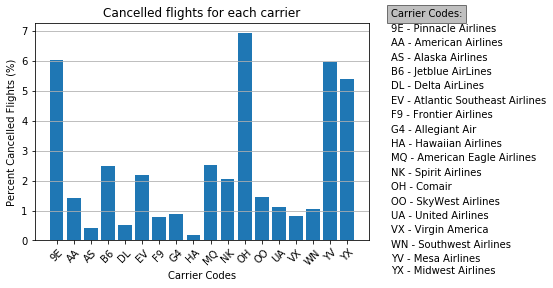

In [16]:
carrier_cancelled_group_df = cancelled_flights_df.groupby("UniqueCarrier")

carrier_cancelled_per = [carrier_cancelled_group_df.get_group(carrier).size/carrier_group_df.get_group(carrier).size* 100 for carrier in unique_carrier_list]

plt.bar(unique_carrier_list,carrier_cancelled_per)
plt.xlabel("Carrier Codes")
plt.ylabel("Percent Cancelled Flights (%)")
plt.xticks(rotation = 45)

plt.title("Cancelled flights for each carrier")
plt.grid(axis='y')
plt.figtext(0.95,0.9, "Carrier Codes:", bbox=dict(facecolor='grey', alpha=0.5) )
plt.figtext(0.95,0.85, "9E - Pinnacle Airlines")
plt.figtext(0.95,0.80, "AA - American Airlines")
plt.figtext(0.95,0.75, "AS - Alaska Airlines")
plt.figtext(0.95,0.70, "B6 - Jetblue AirLines")
plt.figtext(0.95,0.65, "DL - Delta AirLines")
plt.figtext(0.95,0.60, "EV - Atlantic Southeast Airlines")
plt.figtext(0.95,0.55, "F9 - Frontier Airlines")
plt.figtext(0.95,0.50, "G4 - Allegiant Air")
plt.figtext(0.95,0.45, "HA - Hawaiian Airlines")
plt.figtext(0.95,0.40, "MQ - American Eagle Airlines")
plt.figtext(0.95,0.35, "NK - Spirit Airlines")
plt.figtext(0.95,0.30, "OH - Comair")
plt.figtext(0.95,0.25, "OO - SkyWest Airlines")
plt.figtext(0.95,0.20, "UA - United Airlines")
plt.figtext(0.95,0.15, "VX - Virgin America")
plt.figtext(0.95,0.10, "WN - Southwest Airlines")
plt.figtext(0.95,0.05, "YV - Mesa Airlines")
plt.figtext(0.95,0.01, "YX - Midwest Airlines")
plt.show()
plt.tight_layout()



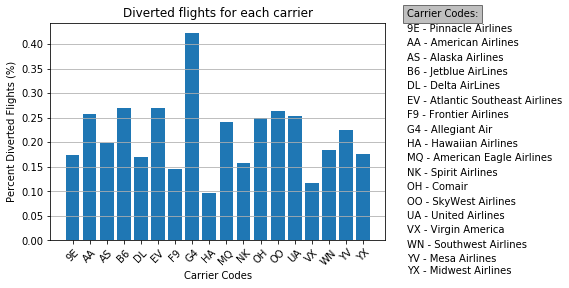

In [17]:
carrier_diverted_group_df = diverted_flights_df.groupby("UniqueCarrier")

carrier_diverted_per = [carrier_diverted_group_df.get_group(carrier).size/carrier_group_df.get_group(carrier).size* 100 for carrier in unique_carrier_list]

plt.bar(unique_carrier_list,carrier_diverted_per)
plt.xlabel("Carrier Codes")
plt.ylabel("Percent Diverted Flights (%)")
plt.xticks(rotation = 45)

plt.title("Diverted flights for each carrier")
plt.grid(axis='y')
plt.figtext(0.95,0.9, "Carrier Codes:", bbox=dict(facecolor='grey', alpha=0.5) )
plt.figtext(0.95,0.85, "9E - Pinnacle Airlines")
plt.figtext(0.95,0.80, "AA - American Airlines")
plt.figtext(0.95,0.75, "AS - Alaska Airlines")
plt.figtext(0.95,0.70, "B6 - Jetblue AirLines")
plt.figtext(0.95,0.65, "DL - Delta AirLines")
plt.figtext(0.95,0.60, "EV - Atlantic Southeast Airlines")
plt.figtext(0.95,0.55, "F9 - Frontier Airlines")
plt.figtext(0.95,0.50, "G4 - Allegiant Air")
plt.figtext(0.95,0.45, "HA - Hawaiian Airlines")
plt.figtext(0.95,0.40, "MQ - American Eagle Airlines")
plt.figtext(0.95,0.35, "NK - Spirit Airlines")
plt.figtext(0.95,0.30, "OH - Comair")
plt.figtext(0.95,0.25, "OO - SkyWest Airlines")
plt.figtext(0.95,0.20, "UA - United Airlines")
plt.figtext(0.95,0.15, "VX - Virgin America")
plt.figtext(0.95,0.10, "WN - Southwest Airlines")
plt.figtext(0.95,0.05, "YV - Mesa Airlines")
plt.figtext(0.95,0.01, "YX - Midwest Airlines")
plt.show()
plt.tight_layout()
plt.show()


Text(1,0.65,'Circle size correlates with Delay Duration for each Carrier')

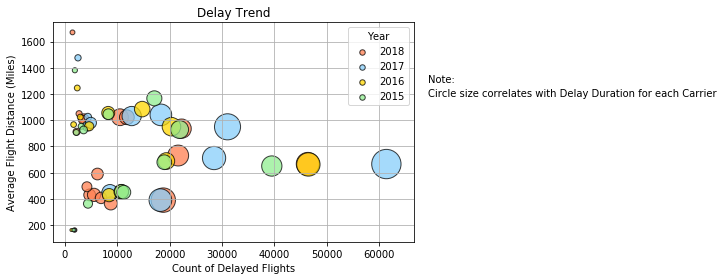

In [18]:
## Obtain the x and y coordinates for each of the three city types

#Grouping the merged dataset by Months - Urban, Suburban, Rural
year_grouped_df = Delay_df.groupby(["Year"])

# #Grouping the Urban cities further by individual city
month_2018_grouped = year_grouped_df.get_group(2018).groupby("UniqueCarrier")

#Grouping the Suburban cities further by individual city
month_2017_grouped = year_grouped_df.get_group(2017).groupby("UniqueCarrier")

#Grouping the Rural cities further by individual city
month_2016_grouped = year_grouped_df.get_group(2016).groupby("UniqueCarrier")

month_2015_grouped = year_grouped_df.get_group(2015).groupby("UniqueCarrier")

#Finding the Average Fare, Total Rides and Driver Count for Urban cities

month_2018_flight_Distance = month_2018_grouped["Distance"].median()
month_2018_delay_count = month_2018_grouped["Flights"].size()
month_2018_delay_minutes = month_2018_grouped["DepDelayMinutes"].sum()

#Finding the Average Fare, Total Rides and Driver Count for Suburban cities
month_2017_flight_Distance = month_2017_grouped["Distance"].median()
month_2017_delay_count = month_2017_grouped["Flights"].size()
month_2017_delay_minutes = month_2017_grouped["DepDelayMinutes"].sum()

#Finding the Average Fare, Total Rides and Driver Count for Rural cities
month_2016_flight_Distance = month_2016_grouped["Distance"].median()
month_2016_delay_count = month_2016_grouped["Flights"].size()
month_2016_delay_minutes = month_2016_grouped["DepDelayMinutes"].sum()

month_2015_flight_Distance = month_2015_grouped["Distance"].median()
month_2015_delay_count = month_2015_grouped["Flights"].size()
month_2015_delay_minutes = month_2015_grouped["DepDelayMinutes"].sum()

# Build the scatter plots for each city types
plt.scatter(month_2018_delay_count, month_2018_flight_Distance, marker="o", s=month_2018_delay_minutes/2000, facecolors = 'coral' , edgecolors="black", alpha=0.75, label="2018")
plt.scatter(month_2017_delay_count, month_2017_flight_Distance, marker="o", s=month_2017_delay_minutes/2000, facecolors = 'lightskyblue' , edgecolors="black", alpha=0.75, label="2017")
plt.scatter(month_2016_delay_count, month_2016_flight_Distance, marker="o", s=month_2016_delay_minutes/2000, facecolors= 'gold' , edgecolors="black", alpha=0.75, label="2016")
plt.scatter(month_2015_delay_count, month_2015_flight_Distance, marker="o", s=month_2015_delay_minutes/2000, facecolors= 'lightgreen' , edgecolors="black", alpha=0.75, label="2015")


# plt.scatter(month_2018_flight_Distance, month_2018_delay_count, marker="o", s=month_2018_delay_minutes/2000, facecolors = 'coral' , edgecolors="black", alpha=0.75, label="2018")
# plt.scatter(month_2017_flight_Distance, month_2017_delay_count, marker="o", s=month_2017_delay_minutes/2000, facecolors = 'lightskyblue' , edgecolors="black", alpha=0.75, label="2017")
# plt.scatter(month_2016_flight_Distance, month_2016_delay_count, marker="o", s=month_2016_delay_minutes/2000, facecolors= 'gold' , edgecolors="black", alpha=0.75, label="2016")
# plt.scatter(month_2015_flight_Distance, month_2015_delay_count, marker="o", s=month_2015_delay_minutes/2000, facecolors= 'lightgreen' , edgecolors="black", alpha=0.75, label="2015")

# Incorporate the other graph properties
plt.title("Delay Trend")
plt.xlabel("Count of Delayed Flights")
plt.ylabel("Average Flight Distance (Miles)")
plt.tight_layout()
plt.grid()

# Create a legend
legend = plt.legend(loc = "best",title = "Year")
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]
legend.legendHandles[3]._sizes = [30]

# Incorporate a text label regarding circle size
plt.figtext(1.0,0.7, "Note:")
plt.figtext(1.0,0.65, "Circle size correlates with Delay Duration for each Carrier")

# # Save Figure
# # plt.savefig("../Images/PyberAnalysis.png")

Text(0.95,0.01,'YX - Midwest Airlines')

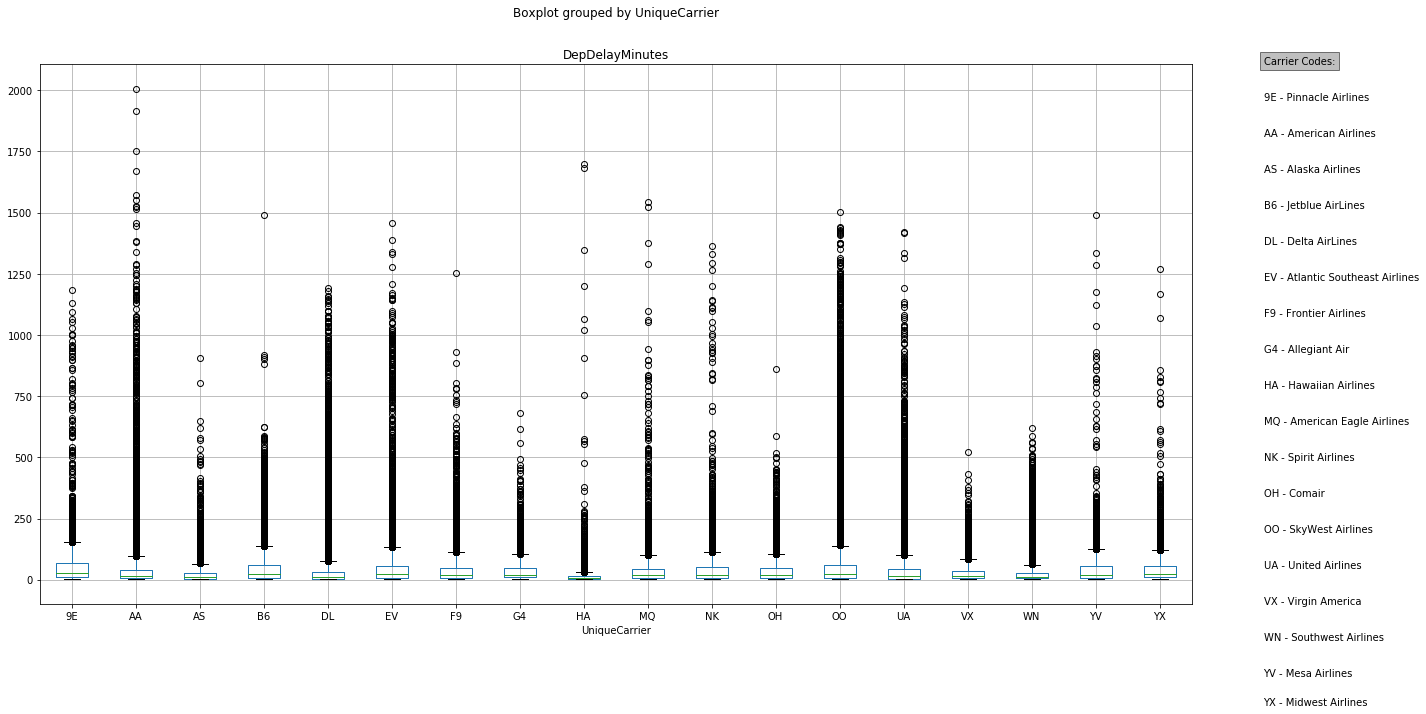

In [31]:
Delay_df.boxplot("DepDelayMinutes", by="UniqueCarrier", figsize=(20, 10))


plt.figtext(0.95,0.9, "Carrier Codes:", bbox=dict(facecolor='grey', alpha=0.5) )
plt.figtext(0.95,0.85, "9E - Pinnacle Airlines")
plt.figtext(0.95,0.80, "AA - American Airlines")
plt.figtext(0.95,0.75, "AS - Alaska Airlines")
plt.figtext(0.95,0.70, "B6 - Jetblue AirLines")
plt.figtext(0.95,0.65, "DL - Delta AirLines")
plt.figtext(0.95,0.60, "EV - Atlantic Southeast Airlines")
plt.figtext(0.95,0.55, "F9 - Frontier Airlines")
plt.figtext(0.95,0.50, "G4 - Allegiant Air")
plt.figtext(0.95,0.45, "HA - Hawaiian Airlines")
plt.figtext(0.95,0.40, "MQ - American Eagle Airlines")
plt.figtext(0.95,0.35, "NK - Spirit Airlines")
plt.figtext(0.95,0.30, "OH - Comair")
plt.figtext(0.95,0.25, "OO - SkyWest Airlines")
plt.figtext(0.95,0.20, "UA - United Airlines")
plt.figtext(0.95,0.15, "VX - Virgin America")
plt.figtext(0.95,0.10, "WN - Southwest Airlines")
plt.figtext(0.95,0.05, "YV - Mesa Airlines")
plt.figtext(0.95,0.01, "YX - Midwest Airlines")

In [21]:
group1 =  master_stats_df[master_stats_df["UniqueCarrier"] == "AA"]["DepDelayMinutes"]
group2 =  master_stats_df[master_stats_df["UniqueCarrier"] == "DL"]["DepDelayMinutes"]
group3 =  master_stats_df[master_stats_df["UniqueCarrier"] == "F9"]["DepDelayMinutes"]
group4 =  master_stats_df[master_stats_df["UniqueCarrier"] == "WN"]["DepDelayMinutes"]
group5 =  master_stats_df[master_stats_df["UniqueCarrier"] == "UA"]["DepDelayMinutes"]


# Perform the ANOVA
stats.f_oneway(group1, group2, group3, group4, group5)

F_onewayResult(statistic=285.0528866233318, pvalue=1.875830598698234e-245)

In [23]:
group1 =  Delay_df[Delay_df["UniqueCarrier"] == "AA"]["DepDelayMinutes"]
group2 =  Delay_df[Delay_df["UniqueCarrier"] == "DL"]["DepDelayMinutes"]
group3 =  Delay_df[Delay_df["UniqueCarrier"] == "F9"]["DepDelayMinutes"]
group4 =  Delay_df[Delay_df["UniqueCarrier"] == "WN"]["DepDelayMinutes"]
group5 =  Delay_df[Delay_df["UniqueCarrier"] == "UA"]["DepDelayMinutes"]


# Perform the ANOVA
stats.f_oneway(group1, group2, group3, group4, group5)

F_onewayResult(statistic=1275.3658076434003, pvalue=0.0)

In [29]:
print(stats.ttest_ind(group1, group2))
print(stats.ttest_ind(group1, group3))
print(stats.ttest_ind(group1, group4))
print(stats.ttest_ind(group1, group5))
print(stats.ttest_ind(group2, group3))
print(stats.ttest_ind(group2, group4))
print(stats.ttest_ind(group2, group5))
print(stats.ttest_ind(group3, group4))
print(stats.ttest_ind(group3, group5))
print(stats.ttest_ind(group4, group5))

Ttest_indResult(statistic=8.55120848727407, pvalue=1.2271764069583912e-17)
Ttest_indResult(statistic=-11.342517508503235, pvalue=8.400211488960852e-30)
Ttest_indResult(statistic=60.94406562912352, pvalue=0.0)
Ttest_indResult(statistic=-3.7315019378065317, pvalue=0.0001904082472760711)
Ttest_indResult(statistic=-15.415690668352347, pvalue=1.4790943491965663e-53)
Ttest_indResult(statistic=46.563150467983476, pvalue=0.0)
Ttest_indResult(statistic=-11.347055367966766, pvalue=7.88745213929231e-30)
Ttest_indResult(statistic=51.78282388905516, pvalue=0.0)
Ttest_indResult(statistic=9.178411966467937, pvalue=4.4835335097033945e-20)
Ttest_indResult(statistic=-62.03010386021522, pvalue=0.0)
